# Data processing (in host)

In [1]:
from DataSyncer import DataSyncerTX, DataSyncerRX
import numpy as np

Load the log files into a DataSyncer object:

In [2]:
dataSyncerTX = DataSyncerTX(
    id="TX0",
    sync_log_path="test-data/TX0-sync.log",
    sensor_log_path="test-data/TX0-data.log",
    num_sensors=4, 
    d_clock=689 * 8 + 8,
    sample_rate=22050,
)
dataSyncerRX1 = DataSyncerRX(id="RX1",
                             sync_log_path="test-data/RX1-sync.log",
                             sensor_log_path="test-data/RX1-data.log",
                             num_sensors=4)
dataSyncerRX2 = DataSyncerRX(id="RX2",
                             sync_log_path="test-data/RX2-sync.log",
                             sensor_log_path="test-data/RX2-data.log",
                             num_sensors=4)


Loading "test-data/TX0-sync.log"...
Loading "test-data/TX0-data.log"...
Offsetting TX0 sensor data...
Loading "test-data/RX1-sync.log"...
Loading "test-data/RX1-data.log"...
Offsetting RX1 sensor data...
Loading "test-data/RX2-sync.log"...
Loading "test-data/RX2-data.log"...
Offsetting RX2 sensor data...


Sync the RX signals to the TX clock:

In [3]:
dataSyncerRX1.syncSensorData(dataSyncerTX)
dataSyncerRX2.syncSensorData(dataSyncerTX)

Syncing RX1 sensor data against TX0...
Dropped 1 extra samples from RX1 sensor data
Dropped 1 extra samples from RX1 sensor data
Syncing RX2 sensor data against TX0...
Added 1 extra samples to RX2 sensor data
Added 1 extra samples to RX2 sensor data
Added 1 extra samples to RX2 sensor data
Added 1 extra samples to RX2 sensor data
Added 1 extra samples to RX2 sensor data


We can now compare the raw signals with the synced signals:

<AxesSubplot: title={'center': 'Raw RX1 Sensor Data'}, xlabel='Frames Elapsed'>

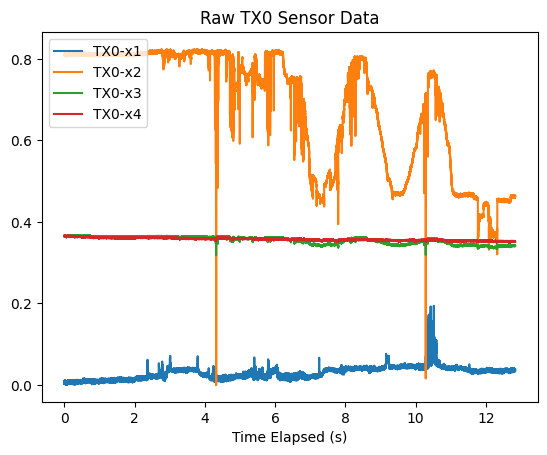

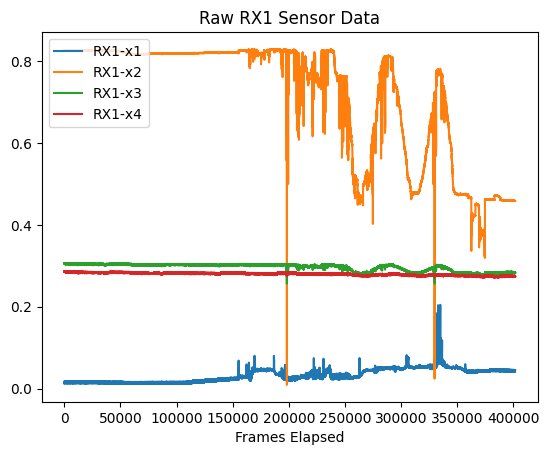

In [4]:
dataSyncerTX.plotSensorRaw()
dataSyncerRX1.plotSensorRaw()

<AxesSubplot: title={'center': 'Synced RX1 Sensor Data'}, xlabel='Frames Elapsed'>

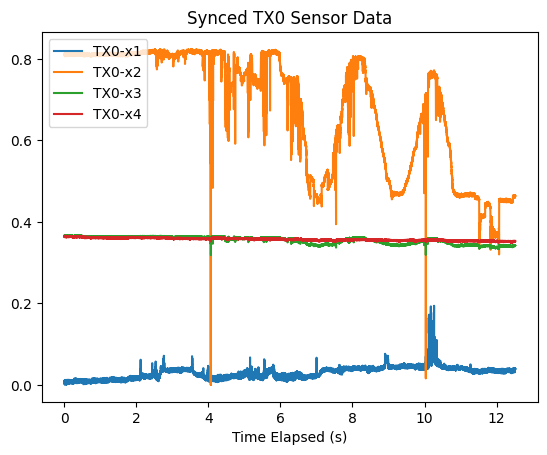

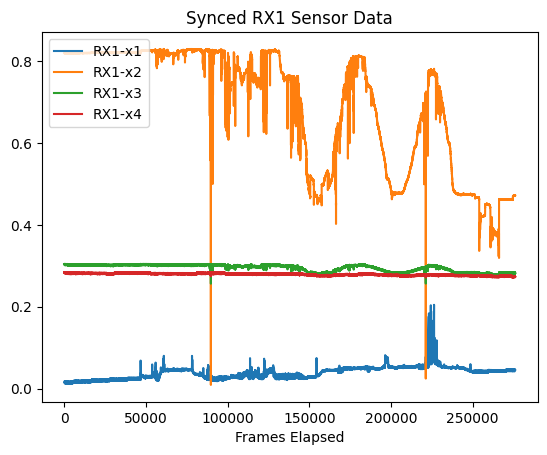

In [5]:
dataSyncerTX.plotSensor()
dataSyncerRX1.plotSensor()

Now you can save the synced signals:

In [6]:
dataSyncerTX.saveSyncedData("test-data/TX")
dataSyncerRX1.saveSyncedData("test-data/RX1")
dataSyncerRX2.saveSyncedData("test-data/RX2")

and load them again using `numpy`:

In [7]:
def SyncedDataLoader(path, id, num_sensors):
    loaded = np.fromfile(path, dtype=[*[("{}-x{}".format(id, str(i)), "f4")
                                        for i in range(1, num_sensors + 1)], ])
    return np.array([list(row) for row in loaded])

sensor_data_TX = SyncedDataLoader(
    path="test-data/TX", id="TX", num_sensors=4)
sensor_data_RX1 = SyncedDataLoader(
    path="test-data/RX1", id="RX1", num_sensors=4)
sensor_data_RX2 = SyncedDataLoader(
    path="test-data/RX2", id="RX2", num_sensors=4)


In [8]:
print(sensor_data_TX.shape, sensor_data_RX1.shape, sensor_data_RX2.shape)

(276000, 4) (276000, 4) (276000, 4)
